# All of my dataset is in "Dataset" Directory
# Part 1
## Data cleaning on US Census Dataset



### 1.    scatterplot that shows average income in a state vs proportion of women in that state.

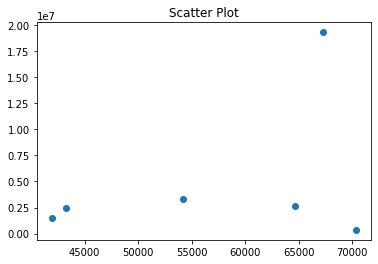

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# try for one state
df_state0=pd.read_csv("states0.csv")

df_state0['Income'] = df_state0.apply(lambda x:x['Income'].replace(',',''),axis=1)
df_state0['Income'] = df_state0.apply(lambda x:float(x['Income'].replace('$','')),axis=1)
Income=df_state0.Income

df_state0['GenderPop']=df_state0.apply(lambda x: x['GenderPop'].split('_')[1],axis=1)
women_Pop=df_state0.apply(lambda x: int(x['GenderPop'].replace('F', '')),axis=1)
plt.scatter(Income, women_Pop)
plt.title('Scatter Plot')
plt.show()

#### As the above plot was did on a single csv file so it is better import first all dataset and then do this process on all states 

### 2. Reading Csv Files concat using glob

In [3]:
import glob

path = "Dataset/"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    if "state" in filename:
        df = pd.read_csv(filename, index_col=None, header=0)
        li.append(df)

us_census_DF = pd.concat(li, axis=0, ignore_index=True)
print("\nDimension of US Census Dataset = {}".format(us_census_DF.shape))


Dimension of US Census Dataset = (60, 11)


### 3. Looking at the .columns and the .dtypes

In [4]:
print("\nStates DataFrame columns = \n{} ".format(us_census_DF.columns))
print("\n\nData Type of DataFrame = \n{}".format(us_census_DF.dtypes))


States DataFrame columns = 
Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object') 


Data Type of DataFrame = 
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


#### For histogram we need numerical data so first we have to do preprocessing of the dataset

### 4. Showing dataframe using head


In [5]:
print(us_census_DF.head())

   Unnamed: 0           State  TotalPop             Hispanic  \
0           0      New Jersey   8904413   18.74950049950049%   
1           1      New Mexico   2084117   45.28293172690762%   
2           2        New York  19673174  17.241424747786684%   
3           3  North Carolina   9845333   8.464762782128062%   
4           4    North Dakota    721640   2.832682926829267%   

                 White                Black                Native  \
0  56.488761238761285%  14.387862137862117%  0.11533466533466513%   
1   40.69799196787147%  1.7550200803212852%    9.248594377510045%   
2    56.4701050030883%  15.668046119003515%  0.32163887173152117%   
3    64.5976508521419%    21.3951174573929%   1.0854905573468434%   
4   87.44829268292683%  1.2843902439024397%    5.651219512195119%   

                 Asian                Pacific               Income  \
0   8.159990009990018%  0.031318681318681325%   $76581.08341708542   
1    1.23433734939759%   0.04277108433734938%   $47329.96787

#### 5. Using regex to turn the Income column into a format that is ready for conversion into a numerical type.

In [6]:
us_census_DF['Income'] = us_census_DF['Income'].replace({'\$': '', ',': ''}, regex=True).astype(float)
print(us_census_DF.Income.dtype)

float64


#### 6. Separating GenderPop into two columns Men and Women

In [7]:
us_census_DF[['Men','Women']]=us_census_DF.GenderPop.str.split("_",expand=True)

print("\n\nUS Census Dataset After Spliting the GenderPOp Column into Men and Women \n{}".format(us_census_DF.head(n=5)))




US Census Dataset After Spliting the GenderPOp Column into Men and Women 
   Unnamed: 0           State  TotalPop             Hispanic  \
0           0      New Jersey   8904413   18.74950049950049%   
1           1      New Mexico   2084117   45.28293172690762%   
2           2        New York  19673174  17.241424747786684%   
3           3  North Carolina   9845333   8.464762782128062%   
4           4    North Dakota    721640   2.832682926829267%   

                 White                Black                Native  \
0  56.488761238761285%  14.387862137862117%  0.11533466533466513%   
1   40.69799196787147%  1.7550200803212852%    9.248594377510045%   
2    56.4701050030883%  15.668046119003515%  0.32163887173152117%   
3    64.5976508521419%    21.3951174573929%   1.0854905573468434%   
4   87.44829268292683%  1.2843902439024397%    5.651219512195119%   

                 Asian                Pacific        Income  \
0   8.159990009990018%  0.031318681318681325%  76581.083417  

### 7. Converting both Men and Women columns into numerical datatypes

In [8]:
us_census_DF['Men']=us_census_DF.apply(lambda x: x['Men'].replace('M', ''),axis=1)
us_census_DF['Women']=us_census_DF.apply(lambda x: x['Women'].replace('F', ''),axis=1)
us_census_DF[['Men','Women']] = us_census_DF[['Men','Women']].apply(pd.to_numeric)
print("\nAfter Removing M and F from the Men and Women Columns \n{}".format(us_census_DF.head(n=5)))
print("\nMen Column Data Type  =  {}".format(us_census_DF.Men.dtype))
print("\nWomen Column Data Type  =   {}".format(us_census_DF.Women.dtype))


After Removing M and F from the Men and Women Columns 
   Unnamed: 0           State  TotalPop             Hispanic  \
0           0      New Jersey   8904413   18.74950049950049%   
1           1      New Mexico   2084117   45.28293172690762%   
2           2        New York  19673174  17.241424747786684%   
3           3  North Carolina   9845333   8.464762782128062%   
4           4    North Dakota    721640   2.832682926829267%   

                 White                Black                Native  \
0  56.488761238761285%  14.387862137862117%  0.11533466533466513%   
1   40.69799196787147%  1.7550200803212852%    9.248594377510045%   
2    56.4701050030883%  15.668046119003515%  0.32163887173152117%   
3    64.5976508521419%    21.3951174573929%   1.0854905573468434%   
4   87.44829268292683%  1.2843902439024397%    5.651219512195119%   

                 Asian                Pacific        Income  \
0   8.159990009990018%  0.031318681318681325%  76581.083417   
1    1.23433734939

### 8. Using matplotlib to make a scatterplot

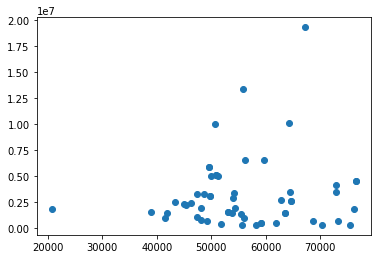

In [9]:
plt.scatter(us_census_DF['Income'], us_census_DF['Women'])
plt.show()

### 9. Filling Women column after NAN with 0

In [10]:
num_Women_per_state=us_census_DF[['State','Women']].groupby('State').count()
print("\n\nNumber of women per state \n {}".format(num_Women_per_state))

us_census_DF['Women'] = us_census_DF['Women'].fillna(0)
print("\n\nAfter filling NA with 0 in women column \n{}".format(us_census_DF['Women'].fillna(0)))



Number of women per state 
                       Women
State                      
Alabama                   1
Alaska                    1
Arizona                   1
Arkansas                  1
California                1
Colorado                  2
Connecticut               1
Delaware                  1
District of Columbia      1
Florida                   1
Georgia                   2
Hawaii                    1
Idaho                     1
Illinois                  1
Indiana                   1
Iowa                      2
Kansas                    1
Kentucky                  1
Louisiana                 1
Maine                     1
Maryland                  0
Massachusetts             1
Michigan                  1
Minnesota                 1
Mississippi               1
Missouri                  2
Montana                   0
Nebraska                  1
Nevada                    1
New Hampshire             1
New Jersey                2
New Mexico                1
New York          

### 10. Checking for Duplicates

In [11]:

Dup_Rows = us_census_DF[us_census_DF.duplicated()]

print("\n\nDuplicate Rows : \n {}".format(Dup_Rows))



Duplicate Rows : 
 Empty DataFrame
Columns: [Unnamed: 0, State, TotalPop, Hispanic, White, Black, Native, Asian, Pacific, Income, GenderPop, Men, Women]
Index: []


### 11. Droping duplicates BTW as we don't have in our case

In [12]:
us_census_DF_RM_DUP = us_census_DF.drop_duplicates(keep='first')
print('\n\nResult DataFrame after duplicate removal :\n', us_census_DF_RM_DUP.head(n=5))



Result DataFrame after duplicate removal :
    Unnamed: 0           State  TotalPop             Hispanic  \
0           0      New Jersey   8904413   18.74950049950049%   
1           1      New Mexico   2084117   45.28293172690762%   
2           2        New York  19673174  17.241424747786684%   
3           3  North Carolina   9845333   8.464762782128062%   
4           4    North Dakota    721640   2.832682926829267%   

                 White                Black                Native  \
0  56.488761238761285%  14.387862137862117%  0.11533466533466513%   
1   40.69799196787147%  1.7550200803212852%    9.248594377510045%   
2    56.4701050030883%  15.668046119003515%  0.32163887173152117%   
3    64.5976508521419%    21.3951174573929%   1.0854905573468434%   
4   87.44829268292683%  1.2843902439024397%    5.651219512195119%   

                 Asian                Pacific        Income  \
0   8.159990009990018%  0.031318681318681325%  76581.083417   
1    1.23433734939759%   0.0

### 12. Now make a scatterplot again

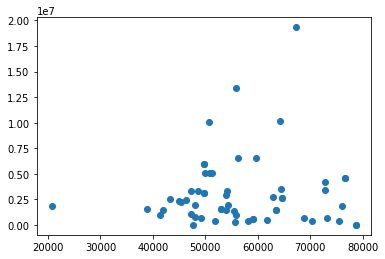

In [14]:
plt.scatter(us_census_DF_RM_DUP['Income'], us_census_DF_RM_DUP['Women'])
plt.show()

### 13. Histograms of Races

In [23]:
print("\n\nVisualizing race columns  \n{}".format(us_census_DF_RM_DUP.columns))



Visualizing race columns  
Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')


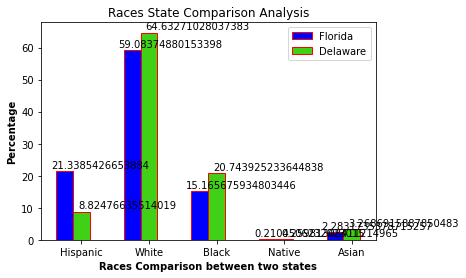

In [26]:
# set width of bar
barWidth = 0.25
mask = (us_census_Races['State'] == 'Delaware')
Delaware_DF=us_census_Races[mask]
mask = (us_census_Races['State'] == 'Florida')
Florida_DF=us_census_Races[mask]

bars1=[]
State_NameF=''
for i in range(len(Florida_DF.columns)):
    if i!=0:
        bars1.append(Florida_DF.iloc[0,i])
    if i==0:
        State_NameF=Florida_DF.iloc[0,i]

bars2=[]
State_NameS=''
for i in range(len(Delaware_DF.columns)):
    if i!=0:
        bars2.append(Delaware_DF.iloc[0,i])
    if i==0:
        State_NameS=Delaware_DF.iloc[0,i]



# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, bars1, color='#0000FF', width=barWidth, edgecolor='red', label=State_NameF)
plt.bar(r2, bars2, color='#40D117', width=barWidth, edgecolor='red', label=State_NameS)


# Add xticks on the middle of the group bars
plt.xlabel('Races Comparison between two states', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Hispanic', 'White', 'Black','Native' ,'Asian'])
plt.title('Races State Comparison Analysis')

i = 1.0
j = 1
k=1.0

# Annotating the bar plot with the values (total death count)
for i in range(len(bars1)):
    plt.annotate(bars1[i], (-0.2 + i, bars1[i] + j))
for k in range(len(bars2)):
    plt.annotate(bars2[k], (+0.2 + k, bars2[k] + j))


# Create legend & Show graphic
plt.legend()
plt.show()


# PART 2:

## LEARN DATA ANALYSIS WITH PANDAS
## Petal Power Inventory

### 1. Load the data into a DataFrame called inventory.

In [28]:
Inventory=pd.read_csv("Dataset/inventory.csv")

#### 2. Inspect the first 10 rows of inventory.

In [29]:
print("\n\nInspecting first 10 rows of Inventory dataframe \n{}".format(Inventory.head(n=10)))
print(Inventory.shape)



Inspecting first 10 rows of Inventory dataframe 
        location  product_type         product_description  quantity  price
0  Staten Island         seeds                       daisy         4   6.99
1  Staten Island         seeds                  calla lily        46  19.99
2  Staten Island         seeds                      tomato        85  13.99
3  Staten Island  garden tools                        rake         4  13.99
4  Staten Island  garden tools                 wheelbarrow         0  89.99
5  Staten Island  garden tools                       spade        93  19.99
6  Staten Island  pest_control               insect killer        74  12.99
7  Staten Island  pest_control                 weed killer         8  23.99
8  Staten Island       planter  20 inch terracotta planter         0  17.99
9  Staten Island       planter      8 inch plastic planter        53   3.99
(29, 5)


#### 3. first 10 rows represent data from your Staten Island location. Select these rows and save them to staten_island.

In [30]:
staten_island=Inventory[Inventory.location == 'Staten Island']
print('\n\nselected staten island location from inventory dataframe\n{}'.format(staten_island.head(n=5)))
print(staten_island.shape)



selected staten island location from inventory dataframe
        location  product_type product_description  quantity  price
0  Staten Island         seeds               daisy         4   6.99
1  Staten Island         seeds          calla lily        46  19.99
2  Staten Island         seeds              tomato        85  13.99
3  Staten Island  garden tools                rake         4  13.99
4  Staten Island  garden tools         wheelbarrow         0  89.99
(10, 5)


#### 4. Select all rows where location is equal to Brooklyn and product_type is equal to seeds and save them to the variable seed_request

In [31]:
product_request=staten_island['product_description']
print("\n\nProduct description of location staten_island \n{}".format(product_request))



Product description of location staten_island 
0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object


#### 5. Select all rows where location is equal to Brooklyn and product_type is equal to seeds and save them to the variable seed_request

In [32]:
mask = (Inventory['location'] == 'Brooklyn') & (Inventory['product_type'] == 'seeds')
seed_request=Inventory[mask]
print("\n\nSeed Request from Brooklyn \n{}".format(seed_request))



Seed Request from Brooklyn 
    location product_type product_description  quantity  price
10  Brooklyn        seeds               daisy        50   6.99
11  Brooklyn        seeds          calla lily         0  19.99
12  Brooklyn        seeds              tomato         0  13.99


#### 6. Add a column to inventory called in_stock which is True if quantity is greater than 0 and False if quantity equals 0.

In [33]:
Inventory['in_stock']=Inventory['quantity'] > 0
print("\n\nAfter Adding in_stock column in Inventory Dataframe \n {}".format(Inventory.head(n=5)))



After Adding in_stock column in Inventory Dataframe 
         location  product_type product_description  quantity  price  in_stock
0  Staten Island         seeds               daisy         4   6.99      True
1  Staten Island         seeds          calla lily        46  19.99      True
2  Staten Island         seeds              tomato        85  13.99      True
3  Staten Island  garden tools                rake         4  13.99      True
4  Staten Island  garden tools         wheelbarrow         0  89.99     False


####  7. Create a column called total_value that is equal to price multiplied by quantity.

In [34]:
Inventory['total_value']=Inventory['price']*Inventory['quantity']
print("\n\nAfter Adding total_value column in Inventory Dataframe \n {}".format(Inventory.head(n=5)))



After Adding total_value column in Inventory Dataframe 
         location  product_type product_description  quantity  price  in_stock  \
0  Staten Island         seeds               daisy         4   6.99      True   
1  Staten Island         seeds          calla lily        46  19.99      True   
2  Staten Island         seeds              tomato        85  13.99      True   
3  Staten Island  garden tools                rake         4  13.99      True   
4  Staten Island  garden tools         wheelbarrow         0  89.99     False   

   total_value  
0        27.96  
1       919.54  
2      1189.15  
3        55.96  
4         0.00  


#### 8. The following lambda function combines product_type and product_description into a single string:

combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)
Paste this function into script.py.

In [35]:
combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)